In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [5]:
dataset = pd.read_csv('Reliance_Stock_Price_Train.csv.',index_col="Date",parse_dates=True)


In [6]:
dataset.head()


,Open,High,Low,Close,Volume
Date,,,,,
2018-12-28,1123.3,1135.90,1122.00,1125.80,343132
2018-12-27,1105.0,1125.90,1104.45,1120.00,454773
2018-12-26,1087.0,1100.65,1066.55,1096.95,474923
2018-12-24,1101.8,1103.00,1086.50,1090.05,270421
2018-12-21,1128.3,1131.40,1095.00,1098.35,835175


In [7]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1230 entries, 2018-12-28 to 2014-01-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1230 non-null   float64
 1   High    1230 non-null   float64
 2   Low     1230 non-null   float64
 3   Close   1230 non-null   float64
 4   Volume  1230 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 57.7 KB


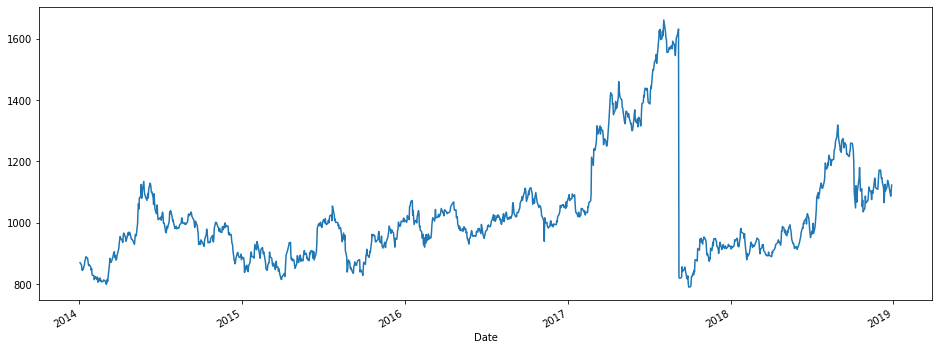

In [9]:
dataset['Open'].plot(figsize=(16,6))

In [10]:

dataset["Close"] = dataset["Close"].astype(float)


In [11]:
dataset["Volume"] = dataset["Volume"].astype(float)

In [12]:

dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-28,NaN,NaN,NaN,NaN,NaN
2018-12-27,NaN,NaN,NaN,NaN,NaN
2018-12-26,NaN,NaN,NaN,NaN,NaN
2018-12-24,NaN,NaN,NaN,NaN,NaN
2018-12-21,NaN,NaN,NaN,NaN,NaN
2018-12-20,NaN,NaN,NaN,NaN,NaN
2018-12-19,1115.435714,1125.050000,1103.200000,1113.642857,543039.428571
2018-12-18,1115.250000,1125.564286,1103.028571,1115.164286,536973.571429
2018-12-17,1116.635714,1126.692857,1103.864286,1116.678571,525558.000000


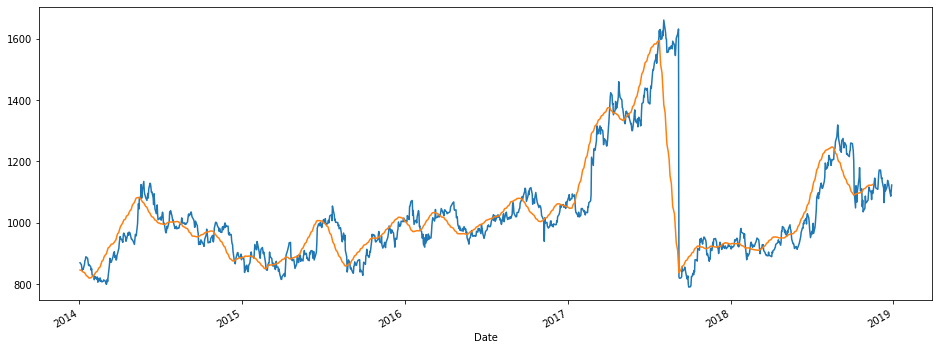

In [13]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

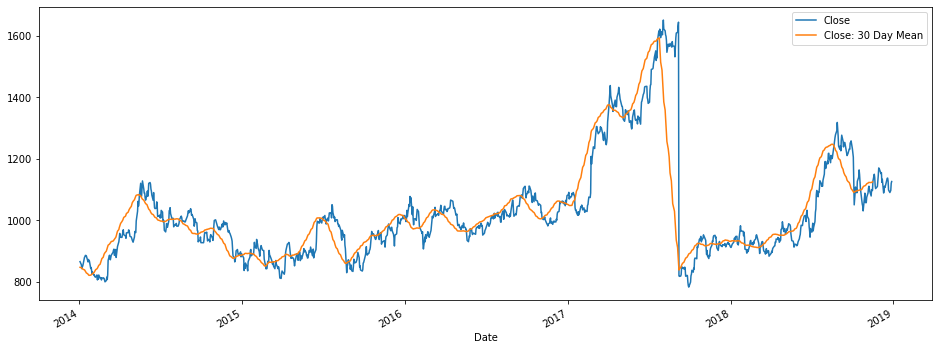

In [14]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

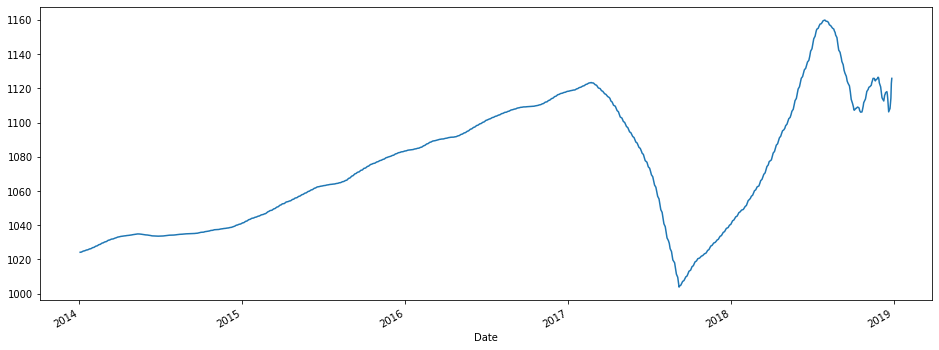

In [15]:

dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [16]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)


In [19]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.38215169]
 [0.36110632]
 [0.34040596]
 ...
 [0.0741763 ]
 [0.08395147]
 [0.09108159]]


In [95]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1200):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
type(X_train)
print(X_train)

[[[0.38215169]
  [0.36110632]
  [0.34040596]
  ...
  [0.46920821]
  [0.5084239 ]
  [0.5372894 ]]

 [[0.36110632]
  [0.34040596]
  [0.35742625]
  ...
  [0.5084239 ]
  [0.5372894 ]
  [0.53935944]]

 [[0.34040596]
  [0.35742625]
  [0.38790179]
  ...
  [0.5372894 ]
  [0.53935944]
  [0.53912943]]

 ...

 [[0.33235582]
  [0.38410672]
  [0.33925594]
  ...
  [0.01955034]
  [0.0230004 ]
  [0.02599045]]

 [[0.38410672]
  [0.33925594]
  [0.33367834]
  ...
  [0.0230004 ]
  [0.02599045]
  [0.02150538]]

 [[0.33925594]
  [0.33367834]
  [0.29210511]
  ...
  [0.02599045]
  [0.02150538]
  [0.0343856 ]]]


In [96]:
# Part 2 - Building the RNN


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model


In [97]:
# Initialising the RNN
regressor = Sequential()



In [98]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [99]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')





In [100]:
print(regressor.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)               

In [101]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1140/1140 [==============================] - 6s 5ms/step - loss: 0.0225
Epoch 2/100
1140/1140 [==============================] - 4s 3ms/step - loss: 0.0105
Epoch 3/100
1140/1140 [==============================] - 4s 3ms/step - loss: 0.0093
Epoch 4/100
1140/1140 [==============================] - 3s 3ms/step - loss: 0.0078
Epoch 5/100
1140/1140 [==============================] - 3s 3ms/step - loss: 0.0080
Epoch 6/100
1140/1140 [==============================] - 4s 3ms/step - loss: 0.0072
Epoch 7/100
1140/1140 [==============================] - 3s 3ms/step - loss: 0.0073
Epoch 8/100
1140/1140 [==============================] - 4s 3ms/step - loss: 0.0057
Epoch 9/100
1140/1140 [==============================] - 3s 3ms/step - loss: 0.0058
Epoch 10/100
1140/1140 [==============================] - 4s 3ms/step - loss: 0.0055A: 1s - l
Epoch 11/100
1140/1140 [==============================] - 4s 3ms/step - loss: 0.0054
Epoch 12/100
1140/1140 [==============================] - 4s 3ms/

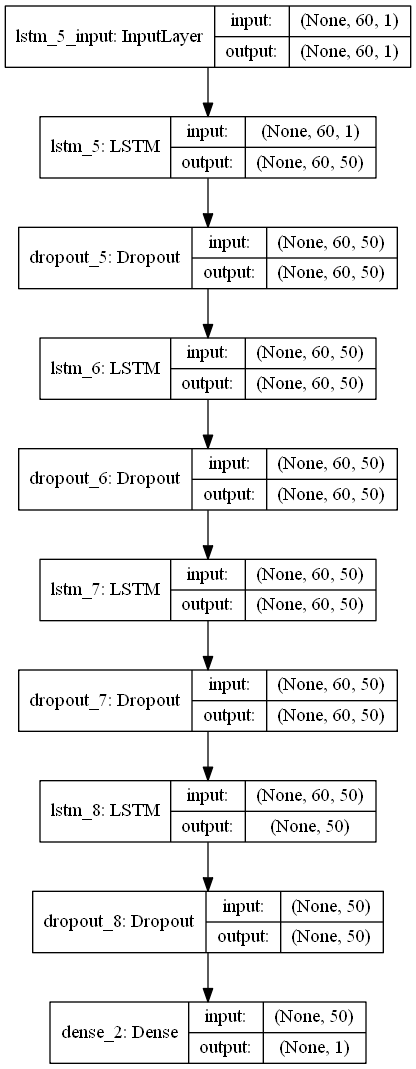

In [103]:
plot_model(regressor, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [104]:


dataset_test = pd.read_csv('Reliance__Stock_Price_Test.csv',index_col="Date",parse_dates=True)



In [105]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [106]:
dataset_test.head()

,Openp,High,Low,Close,Volume
Date,,,,,
2019-01-31,1201.0,1229.80,1201.00,1227.10,620899
2019-01-30,1215.0,1224.90,1190.55,1194.80,450085
2019-01-29,1230.0,1231.90,1201.60,1210.90,578115
2019-01-28,1253.0,1255.45,1221.75,1229.60,787401
2019-01-25,1250.1,1263.00,1236.55,1246.25,516086


In [107]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2019-01-31 to 2019-01-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Openp   21 non-null     float64
 1   High    21 non-null     float64
 2   Low     21 non-null     float64
 3   Close   21 non-null     float64
 4   Volume  21 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 1008.0 bytes


In [108]:
dataset_test["Volume"] = dataset_test["Volume"].astype(float)

In [109]:
test_set=dataset_test['Openp']
test_set=pd.DataFrame(test_set)

In [110]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2019-01-31 to 2019-01-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Openp   21 non-null     float64
dtypes: float64(1)
memory usage: 336.0 bytes


In [111]:

dataset_total = pd.concat((dataset['Open'], dataset_test['Openp']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [112]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


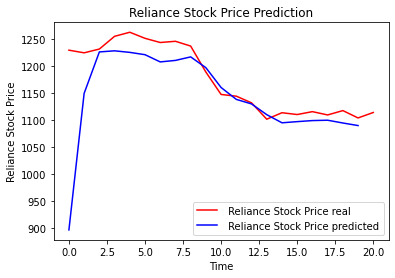

In [114]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = ' Reliance Stock Price real ')
plt.plot(predicted_stock_price, color = 'blue', label = ' Reliance Stock Price predicted')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()
